# Display all rows where data is missing for the specified columns


In [20]:
import pandas as pd

teams_df = pd.read_csv("/Users/vidushi/Documents/Data_Visualization/datasets/olympics/teams.csv")
specified_columns = ['events', 'athletes', 'coaches', 'athletes_codes', 'num_athletes', 'coaches_codes', 'num_coaches']
missing_data_columns = teams_df[specified_columns].isnull().sum()
missing_data_columns = missing_data_columns[missing_data_columns > 0]  # Only keep columns with missing values
missing_data_columns_list = missing_data_columns.index.tolist()  # Convert to list

print("Columns with Missing Data:")
print(missing_data_columns)

for column in missing_data_columns_list:
    print(f"\nRows with Missing Data in Column '{column}':")
    teams_df


Columns with Missing Data:
events             321
athletes             3
coaches           1452
athletes_codes       3
num_athletes         3
coaches_codes     1452
num_coaches       1452
dtype: int64

Rows with Missing Data in Column 'events':

Rows with Missing Data in Column 'athletes':

Rows with Missing Data in Column 'coaches':

Rows with Missing Data in Column 'athletes_codes':

Rows with Missing Data in Column 'num_athletes':

Rows with Missing Data in Column 'coaches_codes':

Rows with Missing Data in Column 'num_coaches':


#  Dynamically read dictionary of DataFrames and Display basic information about each DataFrame

In [1]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# File paths
base_path = "/Users/vidushi/Documents/Data_Visualization/datasets/olympics"
files = ["teams.csv", "medallists.csv", "medals.csv", "medals_total.csv", 
         "athletes.csv", "coaches.csv", "events.csv"]

# Function to safely read CSV files
def safe_read_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Warning: File not found: {file_path}")
        return None

dataframes = {}
for file in files:
    file_path = os.path.join(base_path, file)
    df = safe_read_csv(file_path)
    if df is not None:
        dataframes[file.replace('.csv', '')] = df

print(f"Successfully loaded {len(dataframes)} out of {len(files)} files.")


for name, df in dataframes.items():
    print(f"\n{name} shape: {df.shape}")
    print(f"{name} columns: {df.columns.tolist()}")
    display(df.head(2))  # Show first 2 rows of each DataFrame


Successfully loaded 7 out of 7 files.

teams shape: (1698, 16)
teams columns: ['code', 'current', 'team', 'team_gender', 'country_code', 'country', 'country_long', 'discipline', 'disciplines_code', 'events', 'athletes', 'coaches', 'athletes_codes', 'num_athletes', 'coaches_codes', 'num_coaches']


,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN



medallists shape: (2315, 21)
medallists columns: ['medal_date', 'medal_type', 'medal_code', 'name', 'gender', 'country_code', 'country', 'country_long', 'nationality_code', 'nationality', 'nationality_long', 'team', 'team_gender', 'discipline', 'event', 'event_type', 'url_event', 'birth_date', 'code_athlete', 'code_team', 'is_medallist']


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True



medals shape: (1044, 13)
medals columns: ['medal_type', 'medal_code', 'medal_date', 'name', 'gender', 'discipline', 'event', 'event_type', 'url_event', 'code', 'country_code', 'country', 'country_long']


,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy



medals_total shape: (92, 7)
medals_total columns: ['country_code', 'country', 'country_long', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total']


,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91



athletes shape: (11113, 36)
athletes columns: ['code', 'current', 'name', 'name_short', 'name_tv', 'gender', 'function', 'country_code', 'country', 'country_long', 'nationality', 'nationality_long', 'nationality_code', 'height', 'weight', 'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country', 'residence_place', 'residence_country', 'nickname', 'hobbies', 'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero', 'influence', 'philosophy', 'sporting_relatives', 'ritual', 'other_sports']


,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN



coaches shape: (974, 12)
coaches columns: ['code', 'current', 'name', 'gender', 'function', 'category', 'country_code', 'country', 'country_long', 'disciplines', 'events', 'birth_date']


,code,current,name,gender,function,category,country_code,country,country_long,disciplines,events,birth_date
0,1533246,True,PEDRERO Ofelia,Female,Coach,C,MEX,Mexico,Mexico,Artistic Swimming,Team,1988-03-28
1,1535775,True,RADHI SHENAISHIL,Male,Head Coach,C,IRQ,Iraq,Iraq,Football,Men,1965-07-01



events shape: (329, 5)
events columns: ['event', 'tag', 'sport', 'sport_code', 'sport_url']


,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery


# Function to identify common columns between two DataFrames

In [2]:

def find_common_columns(df1, df2):
    return list(set(df1.columns) & set(df2.columns))

# Main table
teams_df = dataframes.get('teams')
if teams_df is None:
    print("Main table (teams.csv) is missing. Cannot proceed with column mapping.")
else:
    mapping_results = {}
    for name, df in dataframes.items():
        if name != 'teams':
            common_cols = find_common_columns(teams_df, df)
            mapping_results[name] = common_cols
            print(f"\nCommon columns between teams and {name}:")
            print(common_cols)



Common columns between teams and medallists:
['country_long', 'country', 'country_code', 'team_gender', 'discipline', 'team']

Common columns between teams and medals:
['country_long', 'country', 'country_code', 'code', 'discipline']

Common columns between teams and medals_total:
['country_code', 'country_long', 'country']

Common columns between teams and athletes:
['country_long', 'country', 'country_code', 'code', 'current', 'events']

Common columns between teams and coaches:
['country_long', 'country', 'country_code', 'code', 'current', 'events']

Common columns between teams and events:
[]


# Function to check value consistency between two DataFrames for common columns

In [3]:
def check_value_consistency(df1, df1_name, df2, df2_name, common_cols):
    results = {}
    for col in common_cols:
        # Get unique values from both DataFrames for the column
        values_df1 = set(df1[col].dropna().unique())
        values_df2 = set(df2[col].dropna().unique())
        
        # Check if all values in df1 are present in df2
        missing_in_df2 = values_df1 - values_df2
        # Check if all values in df2 are present in df1
        missing_in_df1 = values_df2 - values_df1
        
        # Calculate percentage of matching values
        total_unique_values = len(values_df1.union(values_df2))
        if total_unique_values > 0:
            matching_values = len(values_df1.intersection(values_df2))
            match_percentage = (matching_values / total_unique_values) * 100
        else:
            match_percentage = 100.0  # Both sets empty = 100% match
        
        results[col] = {
            'match_percentage': match_percentage,
            'unique_in_' + df1_name: list(missing_in_df2)[:5] if len(missing_in_df2) > 0 else [],
            'count_unique_in_' + df1_name: len(missing_in_df2),
            'unique_in_' + df2_name: list(missing_in_df1)[:5] if len(missing_in_df1) > 0 else [],
            'count_unique_in_' + df2_name: len(missing_in_df1)
        }
    
    return results

# Check value consistency for common columns between teams and other tables

In [56]:
if teams_df is not None:
    consistency_results = {}
    for name, df in dataframes.items():
        if name != 'teams':
            common_cols = mapping_results[name]
            if common_cols:
                print(f"\nValue consistency check between teams and {name}:")
                table_results = check_value_consistency(teams_df, 'teams', df, name, common_cols)
                consistency_results[name] = table_results
                
                for col, result in table_results.items():
                    print(f"  Column '{col}':")
                    print(f"    Match percentage: {result['match_percentage']:.2f}%")
                    print(f"    Values unique to teams (count): {result['count_unique_in_teams']}")
                    if result['unique_in_teams']:
                        print(f"    Examples unique to teams: {result['unique_in_teams']}")
                    print(f"    Values unique to {name} (count): {result['count_unique_in_' + name]}")
                    if result['unique_in_' + name]:
                        print(f"    Examples unique to {name}: {result['unique_in_' + name]}")



Value consistency check between teams and medallists:
  Column 'country_long':
    Match percentage: 63.33%
    Values unique to teams (count): 28
    Examples unique to teams: ['Iraq', 'Montenegro', 'Samoa', 'Estonia', 'South Sudan']
    Values unique to medallists (count): 16
    Examples unique to medallists: ['Philippines', 'Ethiopia', 'Kyrgyzstan', 'Cyprus', 'Jordan']
  Column 'discipline':
    Match percentage: 62.22%
    Values unique to teams (count): 0
    Values unique to medallists (count): 17
    Examples unique to medallists: ['Cycling Mountain Bike', 'Cycling BMX Racing', 'Breaking', 'Cycling Road', 'Cycling BMX Freestyle']
  Column 'country_code':
    Match percentage: 63.33%
    Values unique to teams (count): 28
    Examples unique to teams: ['EST', 'FRG', 'FIN', 'SSD', 'GDR']
    Values unique to medallists (count): 16
    Examples unique to medallists: ['ARM', 'CPV', 'LCA', 'GRN', 'DMA']
  Column 'team_gender':
    Match percentage: 100.00%
    Values unique to team

# Create a heatmap to visualize match percentages

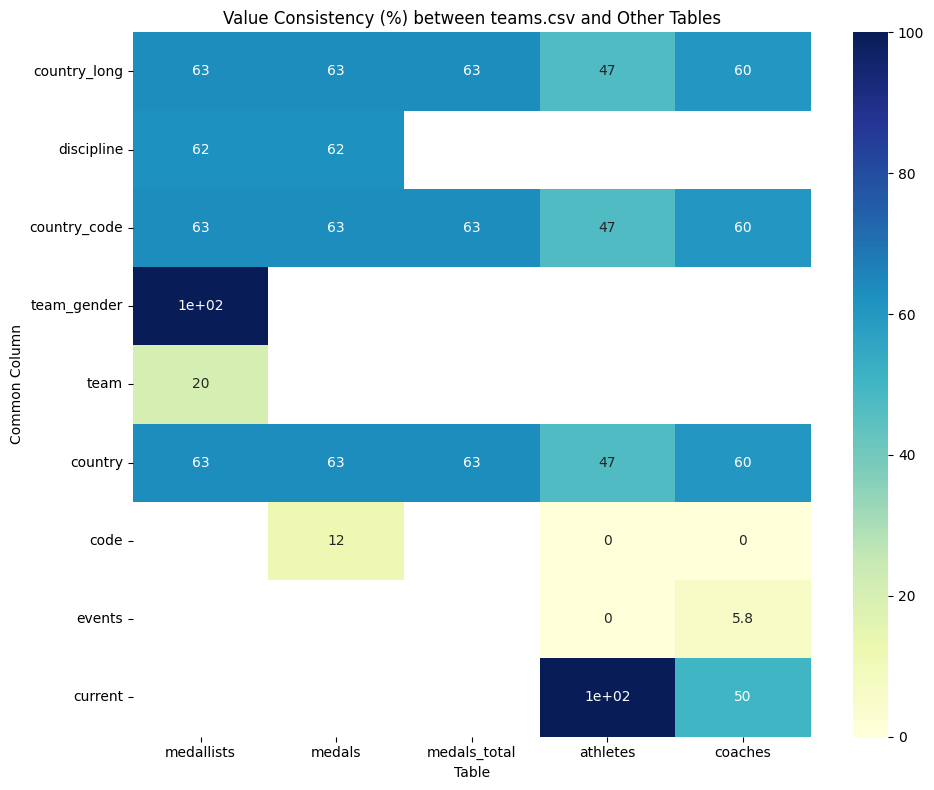

In [57]:

if 'consistency_results' in locals() and consistency_results:
    match_data = {}
    for table_name, table_results in consistency_results.items():
        match_data[table_name] = {col: result['match_percentage'] for col, result in table_results.items()}
    
    # Convert to DataFrame for visualization
    match_df = pd.DataFrame(match_data)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(match_df, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
    plt.title('Value Consistency (%) between teams.csv and Other Tables')
    plt.ylabel('Common Column')
    plt.xlabel('Table')
    plt.tight_layout()
    plt.show()


# E-R Diagram observation

In [5]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Set the directory path
csv_dir = '/Users/vidushi/PycharmProjects/Data_visualization/Files/Cleaned'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_dir, '*.csv'))

# Read each CSV into a DataFrame and store in a dictionary
dataframes = {}
for file in csv_files:
    # Extract just the filename without extension
    df_name = os.path.splitext(os.path.basename(file))[0]
    try:
        df = pd.read_csv(file)
        dataframes[df_name] = df
        print(f"Loaded: {df_name} ({df.shape[0]} rows, {df.shape[1]} columns)")
    except Exception as e:
        print(f"Error loading {df_name}: {e}")

# Find all pairs and their common columns
common_columns = {}
for df1_name, df2_name in combinations(dataframes.keys(), 2):
    df1 = dataframes[df1_name]
    df2 = dataframes[df2_name]
    
    # Find common columns
    common = list(set(df1.columns) & set(df2.columns))
    
    # Only store pairs that have common columns
    if common:
        pair_key = (df1_name, df2_name)
        common_columns[pair_key] = common
        
        # Print detailed information about the relationship
        print(f"\nRelationship: {df1_name} <-> {df2_name}")
        print(f"Common columns: {common}")
        
        # For each common column, check how many values match between datasets
        for col in common:
            if col in df1.columns and col in df2.columns:
                df1_values = set(df1[col].dropna().astype(str))
                df2_values = set(df2[col].dropna().astype(str))
                
                # Calculate match percentage
                if df1_values:
                    match_percentage = len(df1_values.intersection(df2_values)) / len(df1_values) * 100
                    print(f"  - {col}: {match_percentage:.1f}% match ({len(df1_values.intersection(df2_values))} matching values)")

# Summary of all relationships
print("\n--- SUMMARY OF RELATIONSHIPS ---")
for (df1, df2), columns in common_columns.items():
    print(f"{df1} <-> {df2}: {', '.join(columns)}")


Loaded: medals_total (92 rows, 7 columns)
Loaded: cleaned_teams (1698 rows, 13 columns)
Loaded: medallists_data (2315 rows, 16 columns)
Loaded: events (329 rows, 5 columns)
Loaded: athlete_data (11113 rows, 13 columns)
Loaded: medals_data (1044 rows, 11 columns)
Loaded: countries_with_flags (250 rows, 4 columns)

Relationship: medals_total <-> cleaned_teams
Common columns: ['country_code', 'country_long', 'country']
  - country_code: 82.6% match (76 matching values)
  - country_long: 82.6% match (76 matching values)
  - country: 82.6% match (76 matching values)

Relationship: medals_total <-> medallists_data
Common columns: ['country_code', 'country']
  - country_code: 100.0% match (92 matching values)
  - country: 93.5% match (86 matching values)

Relationship: medals_total <-> athlete_data
Common columns: ['country_code']
  - country_code: 100.0% match (92 matching values)

Relationship: medals_total <-> medals_data
Common columns: ['country_code', 'country']
  - country_code: 100.0%

# Create network graph to visualize relationships


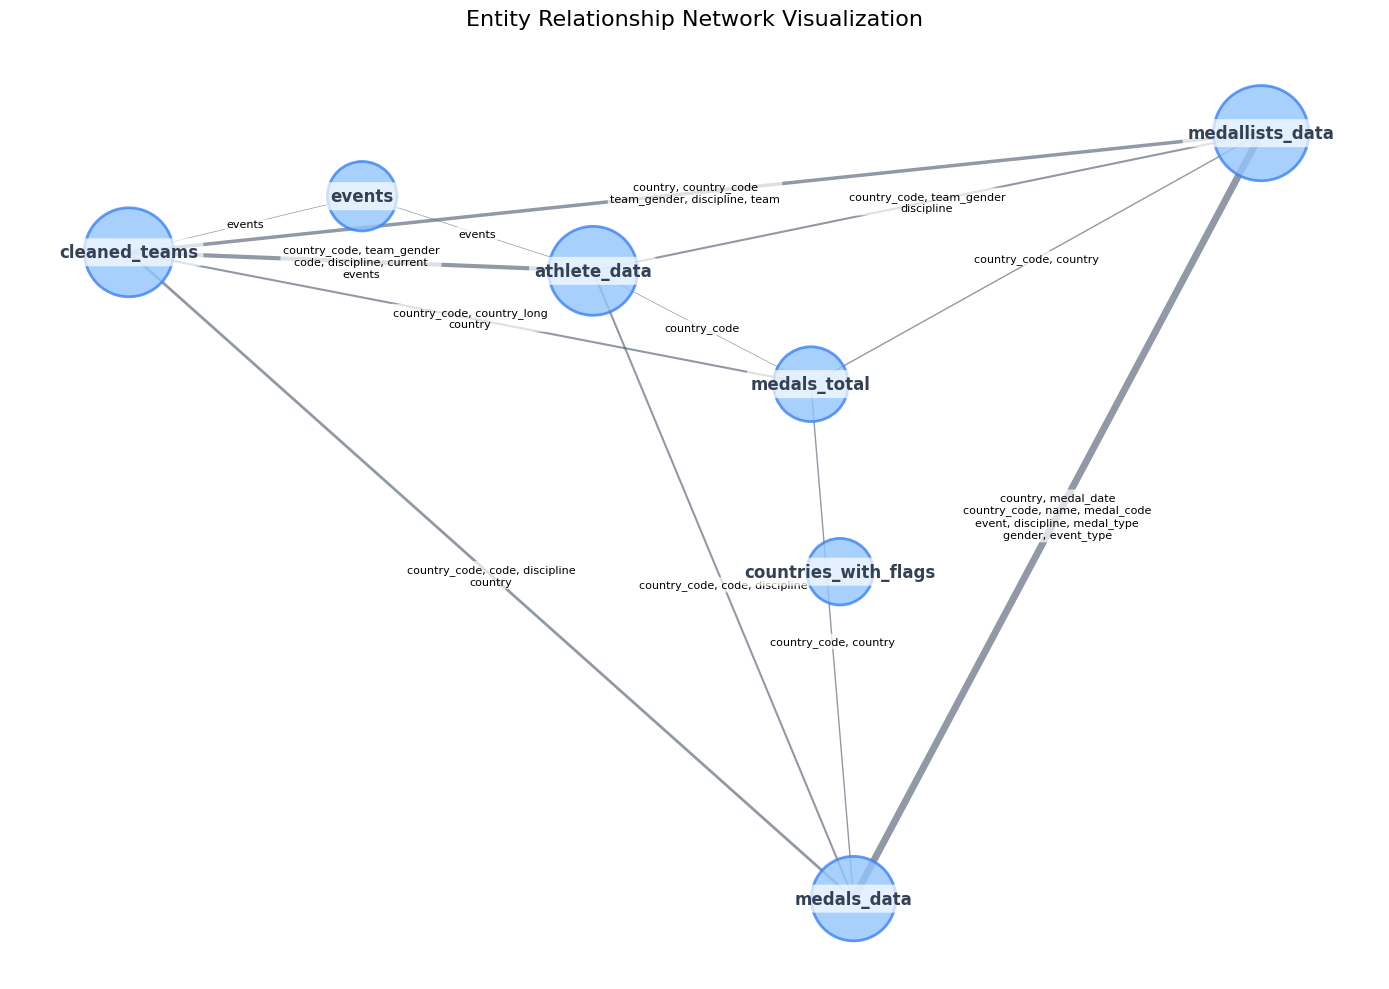

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np

# Create a graph
G = nx.Graph()

# Add nodes (dataframes)
for df_name in dataframes.keys():
    # Count number of columns as a proxy for node importance
    col_count = dataframes[df_name].shape[1]
    G.add_node(df_name, size=col_count)

# Add edges (relationships)
for (df1, df2), columns in common_columns.items():
    # Store the number of common columns as edge weight
    weight = len(columns)
    G.add_edge(df1, df2, label=", ".join(columns), weight=weight)

# Draw the graph with improved layout and styling
plt.figure(figsize=(14, 10))

# Use a better layout algorithm - Kamada-Kawai tends to minimize edge crossings
pos = nx.kamada_kawai_layout(G)

# Node sizes based on number of columns (scaled)
node_sizes = [G.nodes[node].get('size', 5) * 200 + 1500 for node in G.nodes()]

# Draw nodes with a pleasing color and alpha for better visibility
nx.draw_networkx_nodes(G, pos, 
                      node_size=node_sizes,
                      node_color="#93c5fd",  # Light blue
                      alpha=0.8,
                      edgecolors="#3b82f6",  # Darker blue edge
                      linewidths=2)

# Draw edges with varying thickness based on number of common columns
edge_weights = [G[u][v]['weight'] * 0.5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, 
                      width=edge_weights,
                      alpha=0.6,
                      edge_color="#475569")  # Slate gray

# Draw node labels with white background for better contrast
nx.draw_networkx_labels(G, pos, 
                       font_size=12,
                       font_weight='bold',
                       font_color='#334155',  # Dark slate
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Draw edge labels with better visibility
edge_labels = nx.get_edge_attributes(G, 'label')
curved_edge_labels = {}

# Position edge labels slightly better
for edge, label in edge_labels.items():
    # Break long labels into multiple lines (max 30 chars per line)
    words = label.split(", ")
    lines = []
    current_line = words[0]
    
    for word in words[1:]:
        if len(current_line + ", " + word) <= 30:
            current_line += ", " + word
        else:
            lines.append(current_line)
            current_line = word
    
    lines.append(current_line)
    curved_edge_labels[edge] = "\n".join(lines)

nx.draw_networkx_edge_labels(G, pos,
                            edge_labels=curved_edge_labels,
                            font_size=8,
                            font_color='black',
                            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'),
                            rotate=False)

plt.title("Entity Relationship Network Visualization", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('entity_relationship_diagram.png', dpi=300, bbox_inches='tight')
plt.show()
